# Spotify Audio Feature Analysis

## 1.0 Introduction

### 1.1 Background

Spotify is a digital music, podcast, and video streaming service which provides a series of audio features for each track. These features include danceability, energy, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, and key. The audio features will be utilized to investigate if there are discernable differences or relations in these features through time. An initial dataset was constructed consisting of a 1,000 songs from each decade of interest, the 1960's through the 2010's. In addition to the audio features the dataset includes the track id, track name, artist, album type, release date, decade, and popularity.

### 1.2 Import Libraries

In [122]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


### 1.3 Data Import

In [123]:
df_tracks = pd.read_csv('./data/tracks.csv', index_col=0)
df_tracks.head()

,track_id,track_name,artist,album_type,release_date,decade,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,4BP3uh0hFLFRb5cjsgLqDh,Fortunate Son,Creedence Clearwater Revival,album,1969-11-02,1960,82,0.640,0.663,0,-7.516,1,0.0374,0.2010,0.008060,0.152,0.663,132.770,140773,4
1,20OFwXhEXf12DzwXmaV7fj,Bad Moon Rising,Creedence Clearwater Revival,album,1969-08-03,1960,79,0.508,0.774,2,-5.973,1,0.0321,0.0586,0.000005,0.063,0.942,178.946,141600,4
2,1qRA5BS78u3gME0loMl9AA,For What It's Worth,Buffalo Springfield,album,1966-12-05,1960,76,0.653,0.519,2,-10.164,1,0.0497,0.4060,0.020900,0.101,0.822,98.883,153693,4
3,6YffUZJ2R06kyxyK6onezL,Ring of Fire,Johnny Cash,compilation,1963-08-06,1960,71,0.659,0.585,7,-8.189,1,0.0288,0.6230,0.000213,0.348,0.784,104.111,158427,4
4,2fDHuS1PTkHBbCWWZF1ph9,Folsom Prison Blues - Live at Folsom State Pri...,Johnny Cash,album,1968-05-01,1960,69,0.621,0.524,0,-15.269,1,0.0803,0.0652,0.001990,0.893,0.889,110.586,162653,4


#### 1.3.1 Data Description

| Data Field | Data Type | Description | Example/Allowable Values |
| :--------- | :-------- |:---------- | :----------------------- |
| track_id | string |The Spotify ID for the track | 11dFghVXANMKmJXsNCbNI |
| track_name | string| The name of the track | - |
| artist | string | The name of the artist | - |
| album_type | string | The type of the album | album, single, compilation |
| release_date | string | The date the album was first released | - |
| decade | integer | The decade the album was first released | - |
| popularity | integer | The popularity of the track | between 0-100, with 100 being the most popular |
| danceability | float | Describes how suitable a track is for dancing based on a combination of musical elements | between 0.0 (least danceable) and 1.0 (most danceable) |
| energy | float | Represents a perceptual measure of intensity and activity | between 0.0 and 1.0 |
| key | integer | The key the track is in | Integers map to pitches using standard Pitch Class notation (0 = C, 2 = D) |
| loudness | float |The overall loudness of a track in decibels, averaged across the entire track | typically range between -60 and 0 db | 
| mode | integer | Indicates the modality (major or minor) of the track, the type of scale from which its melodic content is derived | 0 (minor) or 1 (major) |
| speechiness | float |Detects the presence of spoken words in a track | values between 1.0-0.66 probably entirely spoken word, 0.65-0.33 contain both music and speech, <0.33 represent music and other non-speech-like tracks |
| acousticness | float | Confidence measure of whether the track is acoustic | 1.0 represents a high confidence the track is acoustic |
| instrumentalness | float |Predicts whether a track contains no vocals | The closer to 1.0 the greater likelihood the track contains no vocal content, values >0.5 are intended to represent instrument tracks |
| liveness | float | Detects the presence of an audience in the recording | higher values represent a increased probability the track was performed live, values >0.8 provides a strong likelihood the track is live |
| valence | float | A measure describing the musical positiveness conveyed by a track | measured from 0.0 to 1.0, tracks with high values are more positive |
| tempo | float | The overall estimated tempo of a track in beats per minute | - |
| duration_ms | integer | The duration of the track in milliseconds | - |
| time_signature | integer | The estimated time signature, a notational convention to specify how many beats are in each bar | between 3 and 7 indicates time signatures of "3/4" to "7/4" |

References: [https://developer.spotify.com/documentation/web-api/reference/#/](https://developer.spotify.com/documentation/web-api/reference/#/)

## 2.0 Data Cleaning

### 2.1 High Level Dataset Examination

In [124]:
df_tracks.nunique()

track_id            5999
track_name          5268
artist               757
album_type             3
release_date        1365
decade                 6
popularity            61
danceability         611
energy               930
key                   12
loudness            4860
mode                   2
speechiness          734
acousticness        1776
instrumentalness    2312
liveness            1143
valence              910
tempo               5719
duration_ms         4803
time_signature         4
dtype: int64

The dataset of 5999 track only has 5268 unique track names. Indicating there is duplicate songs within this dataset that must be removed.

* First create a new dataframe containing all the duplicate track_names. This will be done to further investigate the duplicate track and resolve if possible.
  * Remaining tracks will then be added back to `df_tracks`
* Drop all duplicates from the initial dataframe

### 2.2 Removal of duplicate tracks

#### 2.2.1 Create new dataframe containing all the duplicated track_names

In [125]:
df_duplicates = df_tracks[df_tracks['track_name'].duplicated(keep=False)].sort_values('track_name')
df_tracks.drop_duplicates('track_name', keep=False, inplace=True)

#### 2.2.2 Examination of the duplicated track

The top 10 records of `df_duplicates` highlights the potential issues that can be encountered.
  * A song that was included at a later date in a compilation album
  * A song that has both album_types of album but release dates years apart
  * A song categorized in the correct decade, but has duplicates. 

In [126]:
df_duplicates.head(10)

,track_id,track_name,artist,album_type,release_date,decade,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
233,2EaCm5PYjpwuIvRo3ZfEFe,25 Minutes to Go - Live at Folsom State Prison...,Johnny Cash,album,1968-05-01,1960,43,0.596,0.474,3,-15.004,1,0.3320,0.673,0.000000,0.1960,0.730,119.555,217667,4
130,6uwERhh3sBcQ9eLcfIBmFV,25 Minutes to Go - Live at Folsom State Prison...,Johnny Cash,album,1968-05-02,1960,49,0.669,0.501,3,-12.511,1,0.2040,0.478,0.000002,0.7510,0.854,120.783,176773,4
4891,07j5RLJHwsm4cUb3GGoW3w,9 to 5,Dolly Parton,compilation,2009-10-30,2000,48,0.557,0.615,6,-10.638,1,0.0418,0.500,0.000001,0.4870,0.820,104.475,165653,4
2000,4w3tQBXhn5345eUXDGBWZG,9 to 5,Dolly Parton,album,1980,1980,77,0.554,0.783,6,-5.852,1,0.0457,0.416,0.000002,0.6310,0.813,105.390,162467,4
125,4VkgY55sUbfszX3XjS3LxW,A Boy Named Sue - Live at San Quentin State Pr...,Johnny Cash,album,1969-06-05,1960,48,0.685,0.486,10,-11.898,1,0.3230,0.758,0.000000,0.7160,0.892,101.539,225040,4
4776,279x1F6k9RLQ6qtCAgQTV7,A Boy Named Sue - Live at San Quentin State Pr...,Johnny Cash,compilation,2002-02-12,2000,47,0.657,0.624,10,-7.789,1,0.1120,0.759,0.000000,0.9660,0.890,101.898,226893,4
28,5xMNjx7uqCzMpJZSo4Wq55,A Boy Named Sue - Live at San Quentin State Pr...,Johnny Cash,album,1969-06-04,1960,61,0.630,0.489,10,-12.144,1,0.1800,0.770,0.000000,0.3810,0.796,101.876,233813,4
4213,5jVGZTrDusSvwhRDPmZMSB,A Country Boy Can Survive,"Hank Williams, Jr.",album,2000-08-22,2000,56,0.688,0.459,7,-9.353,1,0.0365,0.144,0.000000,0.0816,0.493,75.184,255000,4
2006,77dcKrzRUI02XjHd2okARp,A Country Boy Can Survive,"Hank Williams, Jr.",album,1981,1980,67,0.688,0.459,7,-9.353,1,0.0365,0.144,0.000000,0.0816,0.493,75.184,255000,4
2650,7BZbzwuGqky0tc7ga8mqAC,A Country Boy Can Survive,"Hank Williams, Jr.",compilation,1982,1980,35,0.688,0.459,7,-9.353,1,0.0365,0.144,0.000000,0.0816,0.493,75.184,255000,4


#### 2.2.3 Removing `compilation` album types
* Release year of compilation albums is not reliable and all compilation albums will be
  removed 
    * This may remove some duplicates that only have an album type of
      compilation but to verify the correct date would require manually checking
      each release date of those songs.

In [127]:
print(f"There are {len(df_duplicates[df_duplicates['album_type'] == 'compilation'])} in the dataset")

df_duplicates = df_duplicates[df_duplicates['album_type'] != 'compilation']
print(f"The duplicates dataset has {len(df_duplicates)} remaining to address.")

There are 314 in the dataset
The duplicates dataset has 1006 remaining to address.


#### 2.2.4 Removing duplicates `album` album types that have two vastly different release data
 * There are individual decade CSV files that will be iterated through and when a track id is found to be in both that record will be added to a clean dataframe and all records with that title will be dropped from `df_duplicates`
   * If a songs track is found in the 1960 data set that track ID will be kept, all other (i.e. ones with a later date will be dropped)

In [128]:
file_list = ['tracks60s.csv', 'tracks70s.csv', 'tracks80s.csv', 'tracks90s.csv', 'tracks00s.csv', 'tracks10s.csv']
matched = pd.DataFrame()

for file in file_list:
    decade_tracks = pd.read_csv('./data/' + file, index_col=0)
    inner_merge = pd.merge(decade_tracks, df_duplicates, how='inner')
    matched = matched.append(inner_merge)

for name in inner_merge['track_name']:
    df_duplicates = df_duplicates[df_duplicates['track_name'] != name]

df_duplicates.head()

,track_id,track_name,artist,album_type,release_date,decade,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
233,2EaCm5PYjpwuIvRo3ZfEFe,25 Minutes to Go - Live at Folsom State Prison...,Johnny Cash,album,1968-05-01,1960,43,0.596,0.474,3,-15.004,1,0.3320,0.673,0.000000,0.196,0.730,119.555,217667,4
130,6uwERhh3sBcQ9eLcfIBmFV,25 Minutes to Go - Live at Folsom State Prison...,Johnny Cash,album,1968-05-02,1960,49,0.669,0.501,3,-12.511,1,0.2040,0.478,0.000002,0.751,0.854,120.783,176773,4
2000,4w3tQBXhn5345eUXDGBWZG,9 to 5,Dolly Parton,album,1980,1980,77,0.554,0.783,6,-5.852,1,0.0457,0.416,0.000002,0.631,0.813,105.390,162467,4
125,4VkgY55sUbfszX3XjS3LxW,A Boy Named Sue - Live at San Quentin State Pr...,Johnny Cash,album,1969-06-05,1960,48,0.685,0.486,10,-11.898,1,0.3230,0.758,0.000000,0.716,0.892,101.539,225040,4
28,5xMNjx7uqCzMpJZSo4Wq55,A Boy Named Sue - Live at San Quentin State Pr...,Johnny Cash,album,1969-06-04,1960,61,0.630,0.489,10,-12.144,1,0.1800,0.770,0.000000,0.381,0.796,101.876,233813,4


#### 2.2.5 Lastly the duplicates that remain are duplicated songs that are categorized in the same decade.
* The analysis will only be to a precision of decade so the duplicates
  remaining will be dropped keeping the default of the first value encountered.  

In [149]:
df_duplicates.drop_duplicates(subset=['track_name'], keep='first', inplace=True)

#### 2.2.6 Examination of the cleaned duplicates dataframe
`df_duplicates` now consists of 520 unique track_id and track_names
* `df_duplicates` will be appended to the initial dataframe

In [130]:
df_duplicates.nunique()

track_id            520
track_name          520
artist              178
album_type            2
release_date        264
decade                5
popularity           54
danceability        310
energy              384
key                  12
loudness            510
mode                  2
speechiness         265
acousticness        430
instrumentalness    318
liveness            334
valence             371
tempo               518
duration_ms         505
time_signature        4
dtype: int64

#### 2.2.7 Create the final dataset
The final tracks dataframe consists of 4680 unique tracks.

In [131]:
df_tracks.append(df_duplicates)
df_tracks.nunique()

track_id            4680
track_name          4680
artist               736
album_type             3
release_date        1225
decade                 6
popularity            59
danceability         594
energy               903
key                   12
loudness            4029
mode                   2
speechiness          693
acousticness        1643
instrumentalness    1986
liveness            1062
valence              892
tempo               4552
duration_ms         3987
time_signature         4
dtype: int64

## 3.0 Exploratory Data Analysis & Visualizations

### 3.1 Feature Distributions

#### 3.1.1 Popularity

<AxesSubplot:xlabel='decade', ylabel='popularity'>

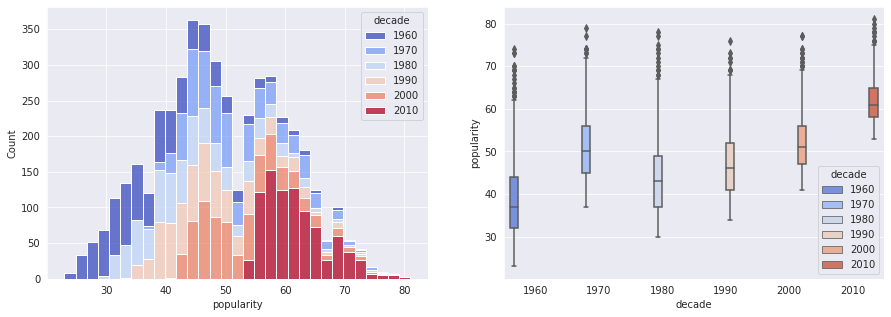

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='popularity', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='popularity', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.2 Danceability

<AxesSubplot:xlabel='decade', ylabel='danceability'>

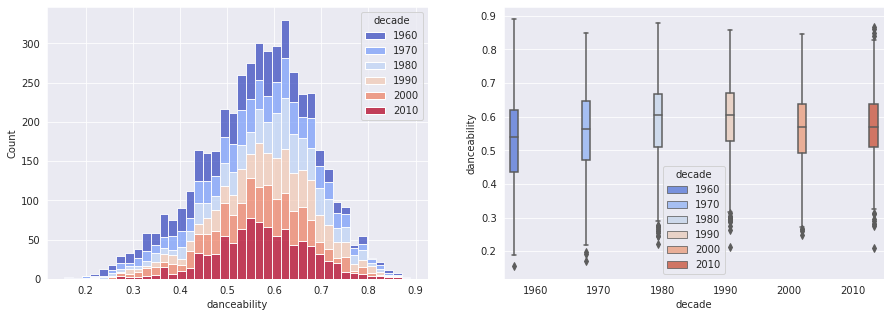

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='danceability', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='danceability', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.3 Energy

<AxesSubplot:xlabel='decade', ylabel='energy'>

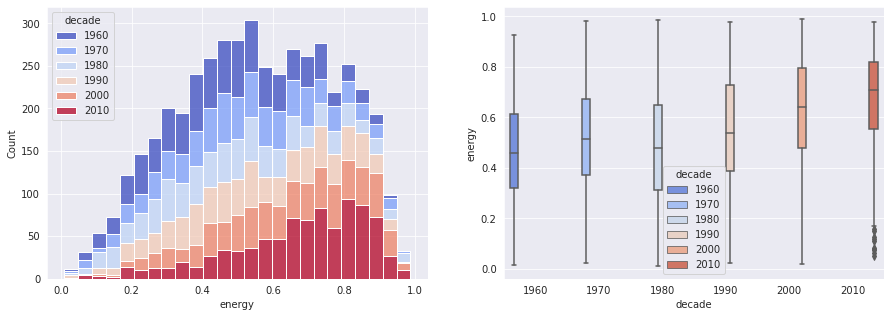

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='energy', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='energy', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.4 Key

<AxesSubplot:xlabel='decade', ylabel='key'>

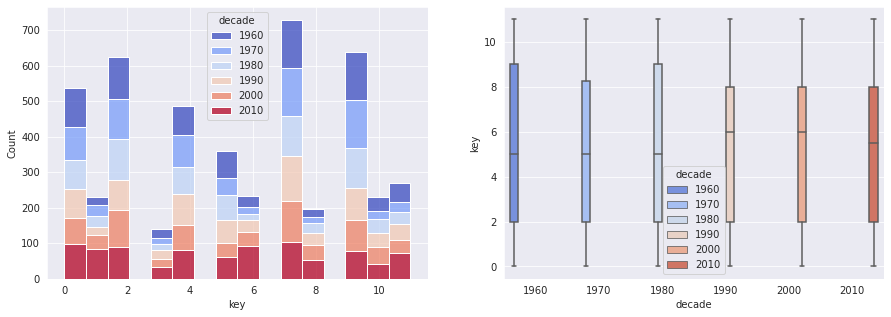

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='key', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='key', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.4 Loudness

<AxesSubplot:xlabel='decade', ylabel='loudness'>

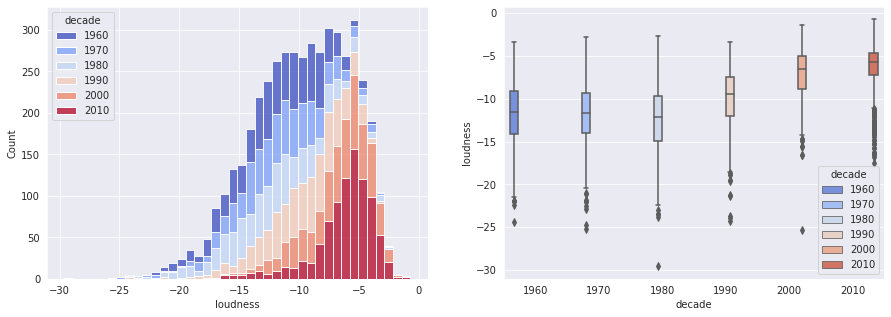

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='loudness', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='loudness', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.5 Mode

<AxesSubplot:xlabel='decade', ylabel='mode'>

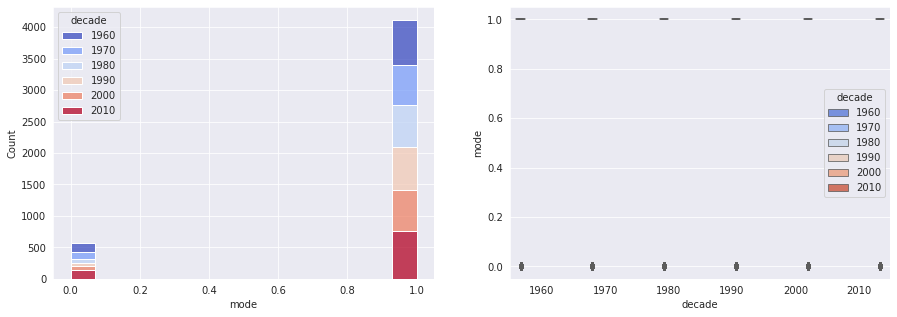

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='mode', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='mode', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.6 Speechiness

<AxesSubplot:xlabel='decade', ylabel='speechiness'>

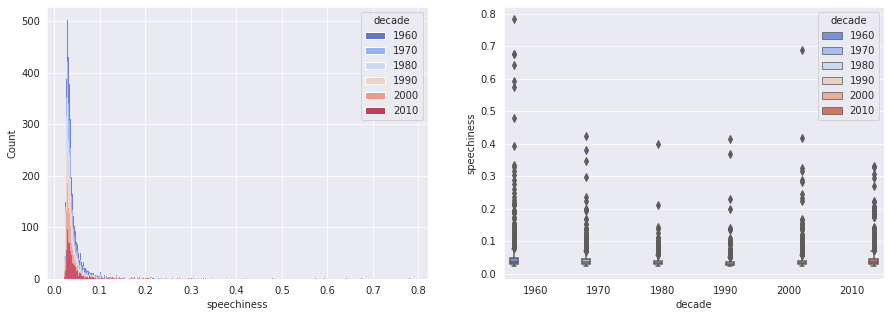

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='speechiness', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='speechiness', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.7 Acousticness

<AxesSubplot:xlabel='decade', ylabel='acousticness'>

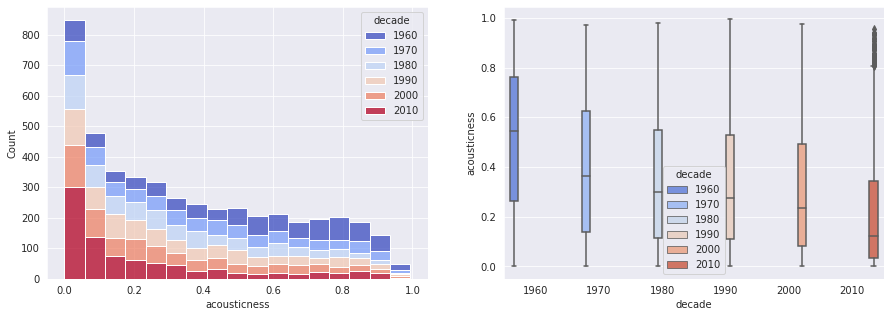

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='acousticness', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='acousticness', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.8 Instrumentalness

<AxesSubplot:xlabel='decade', ylabel='instrumentalness'>

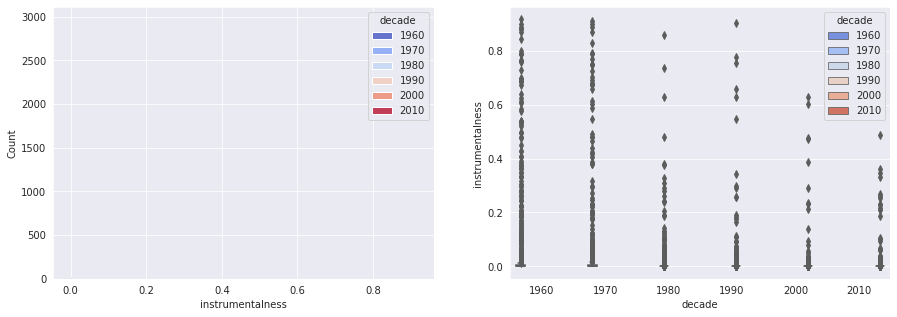

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='instrumentalness', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='instrumentalness', hue='decade', palette='coolwarm', ax=axes[1])

In [141]:
df_tracks['instrumentalness'].describe()

count    4680.000000
mean        0.021388
std         0.097487
min         0.000000
25%         0.000000
50%         0.000007
75%         0.000503
max         0.916000
Name: instrumentalness, dtype: float64

#### 3.1.9 Liveness

<AxesSubplot:xlabel='decade', ylabel='liveness'>

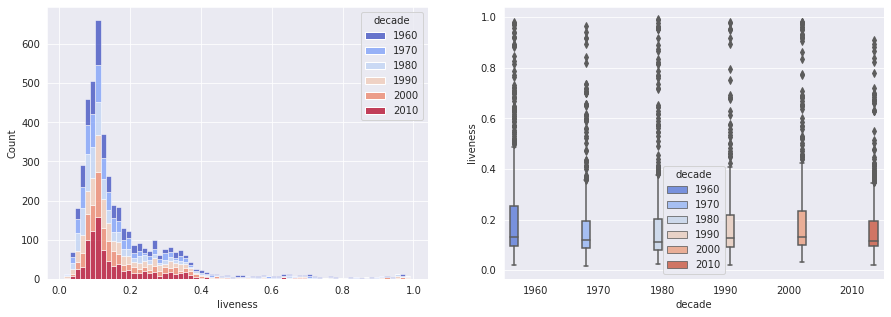

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='liveness', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='liveness', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.10 Valence

<AxesSubplot:xlabel='decade', ylabel='valence'>

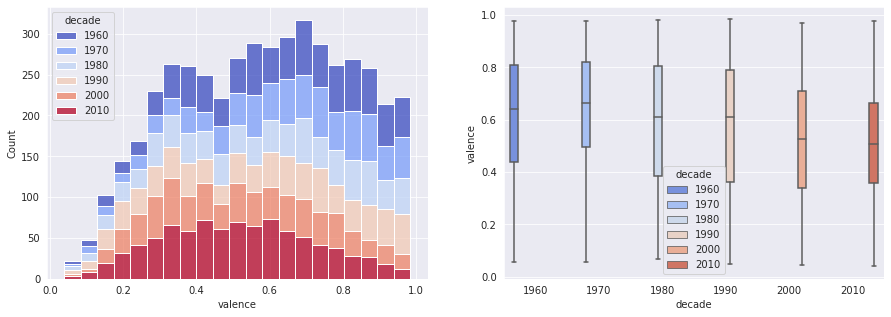

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='valence', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='valence', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.11 Tempo

<AxesSubplot:xlabel='decade', ylabel='tempo'>

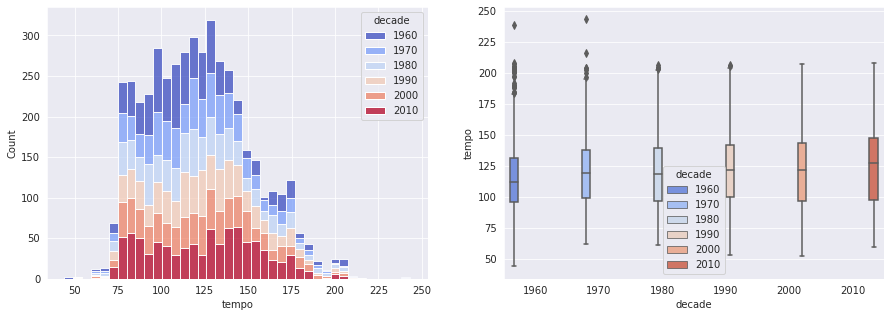

In [144]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='tempo', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='tempo', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.12 Duration (milliseconds)

<AxesSubplot:xlabel='decade', ylabel='duration_ms'>

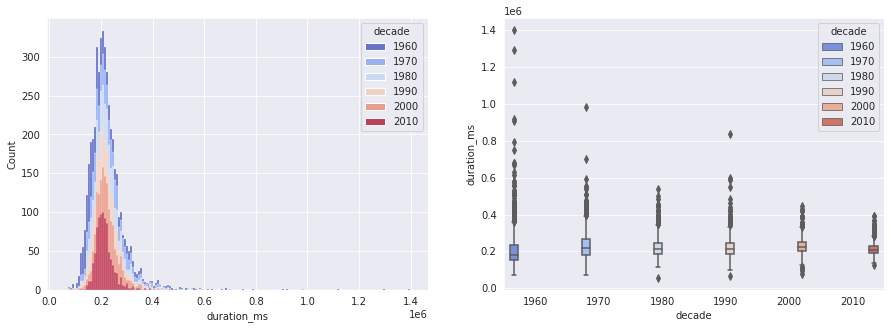

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='duration_ms', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='duration_ms', hue='decade', palette='coolwarm', ax=axes[1])

#### 3.1.13 Time Signature

<AxesSubplot:xlabel='decade', ylabel='time_signature'>

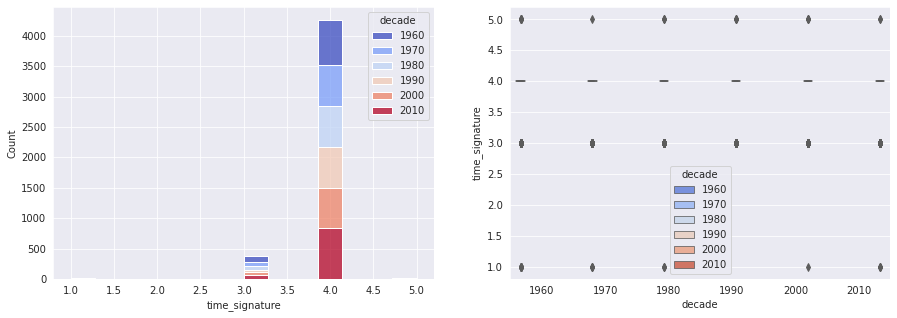

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(df_tracks, x='time_signature', hue='decade', palette='coolwarm', multiple='stack', ax=axes[0])
sns.boxplot(data=df_tracks, x='decade', y='time_signature', hue='decade', palette='coolwarm', ax=axes[1])

### 3.2 Feature Correlation

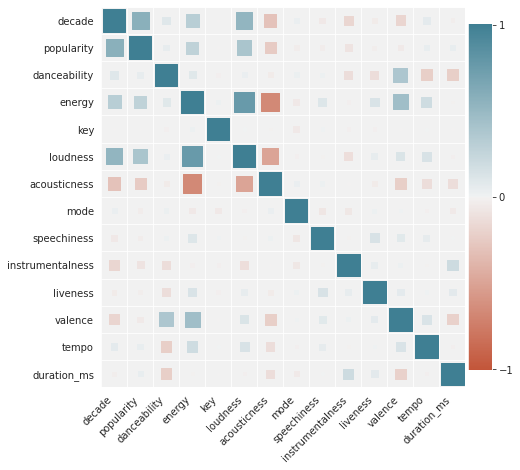

In [147]:
features = df_tracks[['decade'
                    , 'popularity'
                    , 'danceability'
                    , 'energy'
                    , 'key'
                    , 'loudness'
                    , 'acousticness'
                    , 'mode'
                    , 'speechiness'
                    , 'instrumentalness'
                    , 'liveness'
                    , 'valence'
                    , 'tempo'
                    , 'duration_ms']]


import heatmap

plt.figure(figsize=(7,7))
heatmap.corrplot(features.corr())

#### Feature Correlated with Decade
* Acousticness: A confidence measure of whether the track is acoustic
* Energy: Measure representing a perceptual measure of intensity, and activity. Typical an energetic tracks feel fast, loud, and noisy
* Loudness: Overall loudness of a track in decibels (dB)
* Popularity: The popularity of the track
  * This features correlation with decade will not be further examined. Popularity is calculated based in the most part on the total number of play the track has had and how recent those plays are. This calculation would appear to be bias towards more recently released songs.

## 4.0 Feature Analysis by Decade

<AxesSubplot:xlabel='decade', ylabel='loudness'>

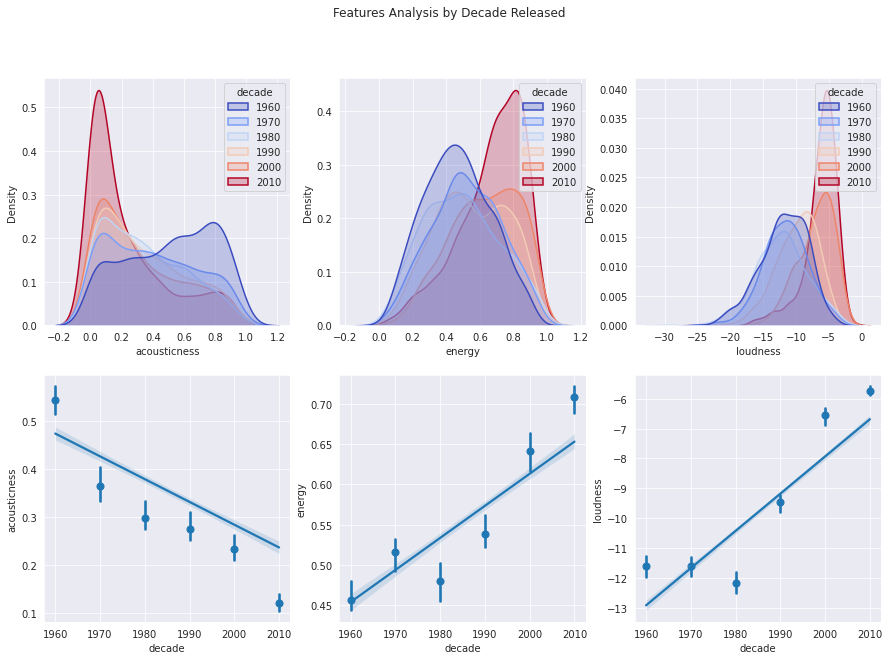

In [148]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

fig.suptitle('Features Analysis by Decade Released')

sns.set_style('darkgrid')
sns.kdeplot(df_tracks["acousticness"], hue=df_tracks["decade"], palette="coolwarm", linewidth=1.5, shade=True, ax=axes[0,0])
sns.kdeplot(df_tracks["energy"], hue=df_tracks["decade"], palette="coolwarm", linewidth=1.5, shade=True, ax=axes[0,1])
sns.kdeplot(df_tracks["loudness"], hue=df_tracks["decade"], palette="coolwarm", linewidth=1.5, shade=True, ax=axes[0,2])

sns.regplot(data=df_tracks, x='decade', y='acousticness', x_estimator=np.median, ax=axes[1,0])
sns.regplot(data=df_tracks, x='decade', y='energy', x_estimator=np.median, ax=axes[1,1])
sns.regplot(data=df_tracks, x='decade', y='loudness', x_estimator=np.median, ax=axes[1,2])

### 4.1 Acousticness
The above plots show a clear shift in the acousticness feature with newer songs, especially those released in the 2010s, being less likely to have a high confidence measure that the track is acoustic.

An interesting feature of this trend is there appears to be a significant shift in the measure between 1960s and 1970s. Then from the 1970s through the 2000s the measure continues to trend lower followed by another significant shit between the 2000s and 2010s.


### 4.2 Energy
The energy feature plot shows there is a positive trend with the energy feature and the decade the song was released.

### 4.3 Loudness
The loudness feature overall shows a trend of increasing with more recently released songs.

An interesting note is that it appears songs released during the 1960s-1980s have relatively similar median loudness values, then a increase  in the median value for songs released in the 1990s, followed by another increase for songs released in the 2000s and 2010s. When 2020s data becomes available it would be interesting to see if the 2000s songs cluster similarly to the 1960-1980s.

### 4.4 Conclusions
Generally the above plots show a trend that newer songs typically are less likely to be acoustic, perceived to be more energetic, and are louder. Although there is a general shift moving from songs released in the 1960's to the 2010's, the songs released in the 2010's appear to be more distinct relative to the other decades.

## 5.0 Discussion

The  analysis detailed in this project showed that of the presented audio features popularity, energy, loudness, and acousticness had the strongest correlation with the decade that the track was released. Of these there was additional analysis conducted for the energy, loudness, and acousticness audio features. Popularity was not further analyzed due to the methods of calculation.

The acousticness feature displayed a consistent decrease in value moving from the 1960s to the 2010s. An interesting take away was that for the 1970s - 2000s the the decrease in the feature appears to be fairly consistent, however the 1960s (high) and the 2010s (low) appear to represent a drastic shift from this trend. The loudness and energy display a similar trend through the decades of release. This trend is characterized by similar values for the 1960s - 1980s, followed by a shift in the 1990s and then trending up for the 2000s and the 2010s.

The cause of this shift was not further examined here. However, supplement research into the music industry and country music during the time period of interest uncovered some potential reasons. Changes that impacted the music industry include the founding of MTV in 1981, this represented a change from solely listening to music on the radio to more of an emphasis on video and the need to grab the listeners attention. Specific to country music the 1990s was a time the genre shifted, moving from the "Nashville Sound" popularized in the 1950s to a more current sound which incorporated aspects of pop music ([source](https://grizzlyrose.com/90s-country-music/)).

In today's music industry the concept of genre is a more fluid concept. Today all genres pull influence from other genres and perhaps for country music this blending began to occur in the 1990s and is highlighted by the increase in the loudness and energy features and a decrease in the acousticness feature resulting in the shift in these measures over time.
